In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 120
plt.style.use("dark_background")

In [59]:
df=pd.read_csv("GlobalTemperatures.csv")

In [60]:
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [61]:
df.head(8)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df.LandMaxTemperature.max()

21.32

In [103]:
df.LandMaxTemperature.mean()

np.float64(14.350600903614458)

In [62]:
df.isna().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [63]:
possible_date_cols = [c for c in df.columns if c.lower() in ('dt', 'date', 'time')]

if possible_date_cols:
    date_col = possible_date_cols[0]
else:
    date_col = df.columns[0]

In [64]:
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
print('Parsed date column:', date_col)

Parsed date column: dt


In [65]:
candidates = ['LandAndOceanAverageTemperature','LandAverageTemperature','AverageTemperature','LandAverageTemperatureUncertainty']
temp_col = None
for c in candidates:
    if c in df.columns:
        temp_col = c
        break

In [66]:
if temp_col is None:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if date_col in numeric_cols:
        numeric_cols.remove(date_col)
    if numeric_cols:
        temp_col = numeric_cols[0]
assert temp_col is not None, 'No temperature-like column found. Inspect your CSV.'
print('Using temperature column:', temp_col)

Using temperature column: LandAndOceanAverageTemperature


In [67]:
df['Year'] = df[date_col].dt.year
df['Month'] = df[date_col].dt.month

In [68]:
df = df.sort_values(by=date_col)
df[temp_col] = df[temp_col].interpolate(method='linear')
df = df.dropna(subset=[date_col, temp_col])

In [69]:
df[date_col].min(), 'to', df[date_col].max()
df[date_col].isna().sum(), df[temp_col].isna().sum()

(np.int64(0), np.int64(0))

In [70]:
df[[date_col, 'Year', 'Month', temp_col]].head()

,dt,Year,Month,LandAndOceanAverageTemperature
1200,1850-01-01,1850,1,12.833
1201,1850-02-01,1850,2,13.588
1202,1850-03-01,1850,3,14.043
1203,1850-04-01,1850,4,14.667
1204,1850-05-01,1850,5,15.507


In [71]:
data = df[[date_col, 'Year', 'Month', temp_col]].copy()
data.rename(columns={temp_col: 'Temperature'}, inplace=True)
annual = data.groupby('Year', as_index=False)['Temperature'].mean()
monthly_clim = data.groupby('Month', as_index=False)['Temperature'].mean()

In [72]:
annual.head()

,Year,Temperature
0,1850,14.867167
1,1851,14.991833
2,1852,15.006500
3,1853,14.955167
4,1854,14.991000


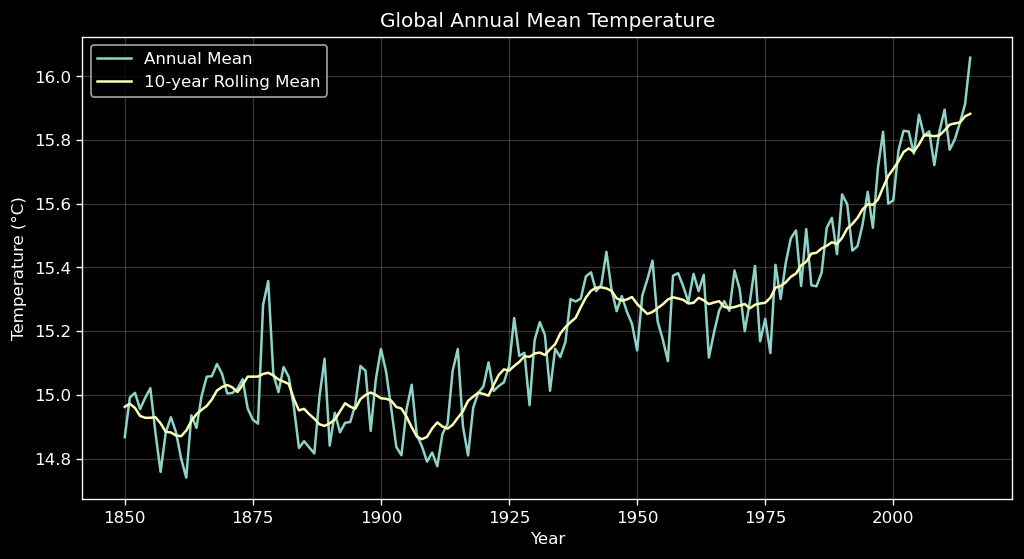

In [73]:
annual['Roll10'] = annual['Temperature'].rolling(window=10, min_periods=5, center=True).mean()

plt.plot(annual['Year'], annual['Temperature'], label='Annual Mean')
plt.plot(annual['Year'], annual['Roll10'], label='10-year Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Global Annual Mean Temperature')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

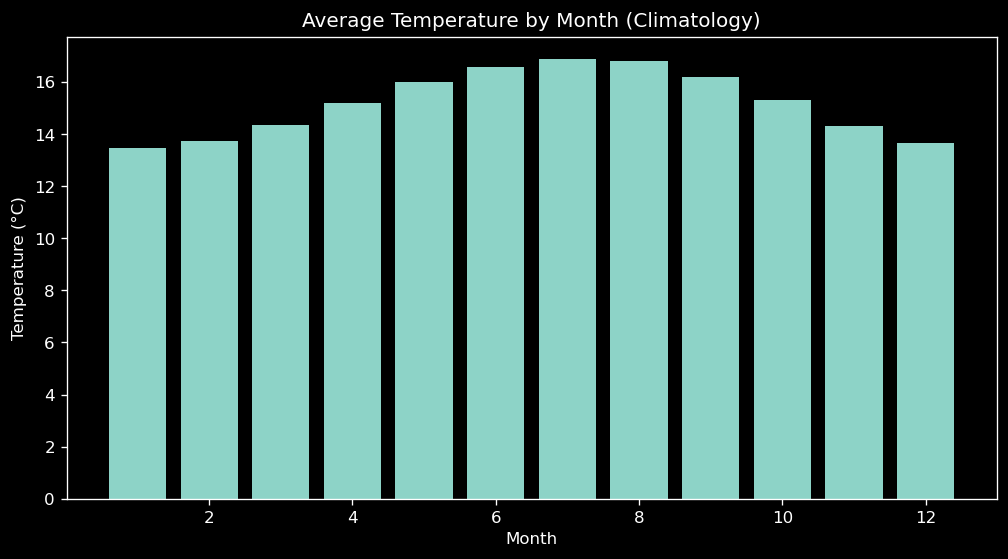

In [74]:
plt.bar(monthly_clim['Month'], monthly_clim['Temperature'])
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature by Month (Climatology)')
plt.show()

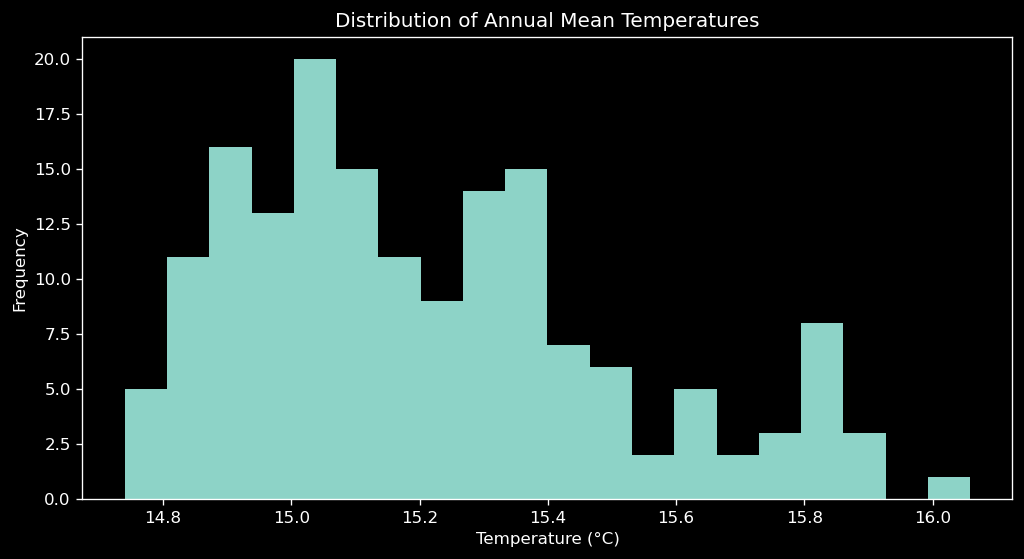

In [75]:
plt.hist(annual['Temperature'].dropna(), bins=20)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Mean Temperatures')
plt.show()

In [76]:
temp_mean = annual['Temperature'].mean()
above = (annual['Temperature'] > temp_mean).sum()
below = (annual['Temperature'] <= temp_mean).sum()

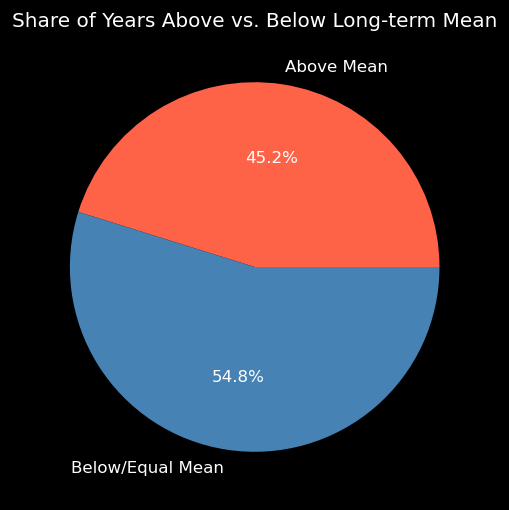

In [77]:
plt.pie([above, below], labels=['Above Mean', 'Below/Equal Mean'], autopct='%1.1f%%',colors=['#FF6347', '#4682B4'])
plt.title('Share of Years Above vs. Below Long-term Mean')
plt.show()

In [78]:
annual.nlargest(10, 'Temperature')[['Year', 'Temperature']].sort_values('Year')
annual.nsmallest(10, 'Temperature')[['Year', 'Temperature']].sort_values('Year')

,Year,Temperature
7,1857,14.758250
11,1861,14.800667
12,1862,14.740083
34,1884,14.833250
37,1887,14.816000
54,1904,14.810417
59,1909,14.790333
60,1910,14.819083
61,1911,14.776000
67,1917,14.809750


In [79]:
annual['Z'] = (annual['Temperature'] - temp_mean) / annual['Temperature'].std()
anomalies = annual[np.abs(annual['Z']) > 2]
anomalies.shape[0]
display(anomalies)

,Year,Temperature,Roll10,Z
148,1998,15.826000,15.651142,2.054168
152,2002,15.829167,15.762408,2.064772
153,2003,15.826583,15.773758,2.056122
155,2005,15.879250,15.785967,2.232483
156,2006,15.813500,15.814450,2.012310
157,2007,15.827333,15.814650,2.058633
159,2009,15.827167,15.814750,2.058075
160,2010,15.895500,15.830325,2.286899
163,2013,15.854417,15.855219,2.149325
164,2014,15.913000,15.874357,2.345500


In [80]:
X = annual[['Year']].values
y = annual['Temperature'].values

In [81]:
split_idx = int(len(annual) * 0.85)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
X_train[0,0], 'to', X_train[-1,0]
X_test[0,0], 'to', X_test[-1,0]

(np.int32(1991), 'to', np.int32(2015))

In [82]:
degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [83]:
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

LinearRegression()

In [84]:
y_pred_lin = linreg.predict(X_test_poly)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = mean_squared_error(y_test, y_pred_lin) ** 0.5  
r2_lin = r2_score(y_test, y_pred_lin)


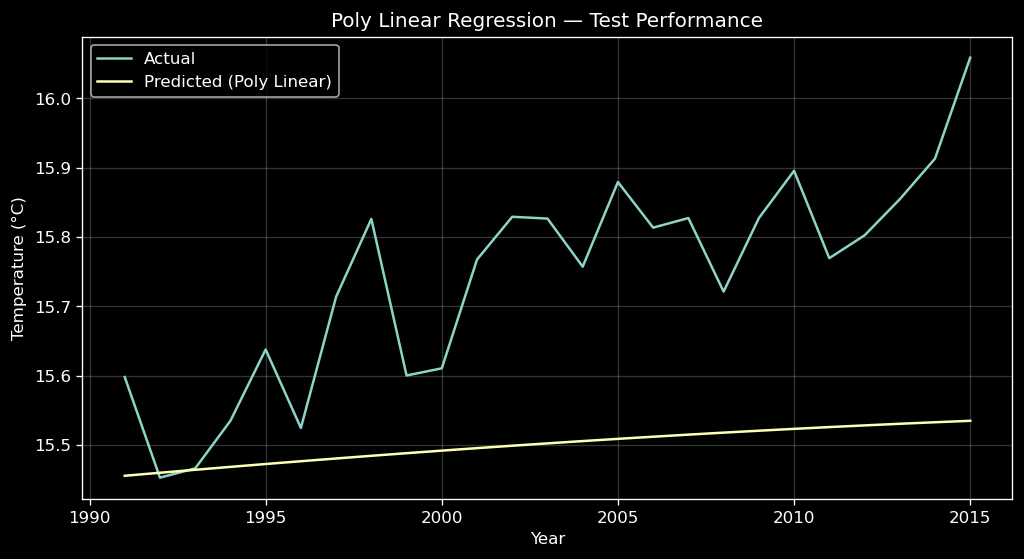

In [99]:
plt.plot(X_test.flatten(), y_test, label='Actual')
plt.plot(X_test.flatten(), y_pred_lin, label='Predicted (Poly Linear)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Poly Linear Regression — Test Performance')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = mean_squared_error(y_test, y_pred_lin) ** 0.5   # universal RMSE
r2_lin = r2_score(y_test, y_pred_lin)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

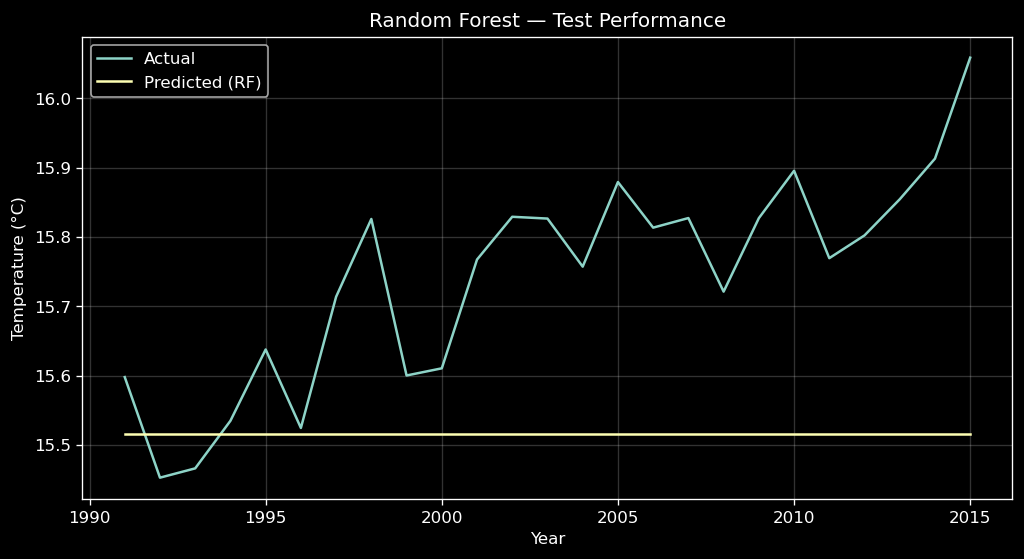

In [100]:
plt.plot(X_test.flatten(), y_test, label='Actual')
plt.plot(X_test.flatten(), y_pred_rf, label='Predicted (RF)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Random Forest — Test Performance')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [89]:
hist_last_year = int(annual['Year'].max())
forecast_years_2050 = np.arange(hist_last_year + 1, 2050 + 1).reshape(-1, 1)
forecast_years_2100 = np.arange(hist_last_year + 1, 2100 + 1).reshape(-1, 1)

In [90]:
pred_2050 = linreg.predict(poly.transform(forecast_years_2050))
pred_2100 = linreg.predict(poly.transform(forecast_years_2100))

In [91]:
forecast_2050 = pd.DataFrame({'Year': forecast_years_2050.flatten(), 'PredictedTemperature': pred_2050})
forecast_2100 = pd.DataFrame({'Year': forecast_years_2100.flatten(), 'PredictedTemperature': pred_2100})

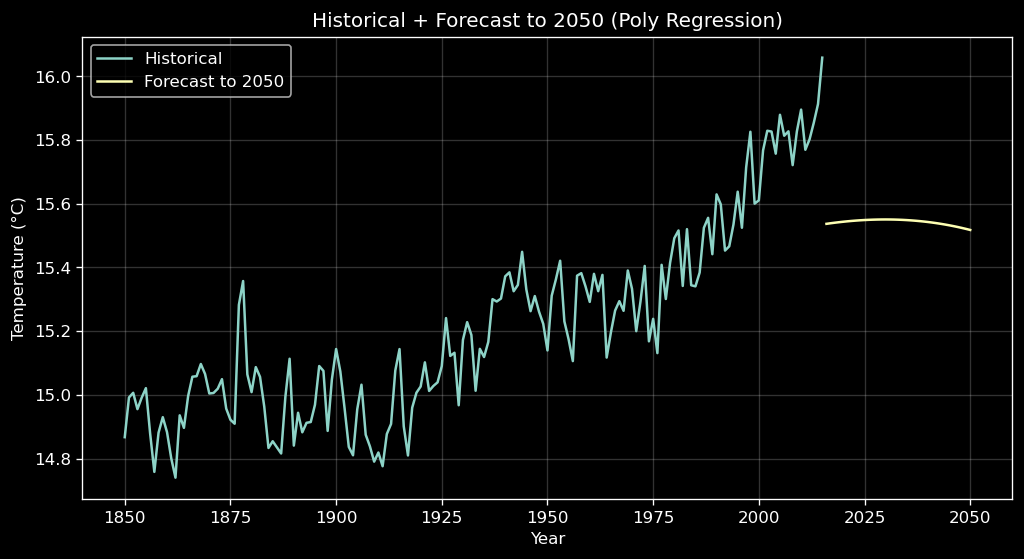

In [101]:
plt.plot(annual['Year'], annual['Temperature'], label='Historical')
plt.plot(forecast_2050['Year'], forecast_2050['PredictedTemperature'], label='Forecast to 2050')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Historical + Forecast to 2050 (Poly Regression)')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [93]:
mean_temp = annual['Temperature'].mean()
std_temp = annual['Temperature'].std()

In [94]:
above_pct = above / (above + below) * 100
below_pct = below / (above + below) * 100

In [95]:
top10 = annual.nlargest(10, 'Temperature')[['Year', 'Temperature']]
bottom10 = annual.nsmallest(10, 'Temperature')[['Year', 'Temperature']]

In [96]:
annual[['Year', 'Roll10']].dropna().head()

,Year,Roll10
0,1850,14.962333
1,1851,14.972125
2,1852,14.958869
3,1853,14.933792
4,1854,14.927981


In [97]:
annual['Delta'] = annual['Temperature'].diff()
big_jumps = annual.nlargest(10, 'Delta')[['Year', 'Delta', 'Temperature']]

In [98]:
display(anomalies)

,Year,Temperature,Roll10,Z
148,1998,15.826000,15.651142,2.054168
152,2002,15.829167,15.762408,2.064772
153,2003,15.826583,15.773758,2.056122
155,2005,15.879250,15.785967,2.232483
156,2006,15.813500,15.814450,2.012310
157,2007,15.827333,15.814650,2.058633
159,2009,15.827167,15.814750,2.058075
160,2010,15.895500,15.830325,2.286899
163,2013,15.854417,15.855219,2.149325
164,2014,15.913000,15.874357,2.345500
